<a href="https://colab.research.google.com/github/DSLUCIFER/Network-intrusion-detection/blob/main/NIDS_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
data = pd.read_csv('/content/drive/MyDrive/CS/final(2).csv')

In [41]:
print(data.columns)

Index(['Time', 'Protcol', 'Flag', 'Family', 'Clusters', 'SeddAddress',
       'ExpAddress', 'BTC', 'USD', 'Netflow_Bytes', 'IPaddress', 'Threats',
       'Port', 'Prediction'],
      dtype='object')


In [42]:
print(data.head())

   Time Protcol Flag    Family  Clusters SeddAddress ExpAddress  BTC  USD  \
0    50     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  500   
1    40     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  504   
2    30     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  508   
3    20     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  512   
4    57     TCP    A  WannaCry         1    1DA11mPS   1BonuSr7    1  516   

   Netflow_Bytes IPaddress Threats  Port Prediction  
0              5         A   Bonet  5061         SS  
1              8         A   Bonet  5061         SS  
2              7         A   Bonet  5061         SS  
3             15         A   Bonet  5061         SS  
4              9         A   Bonet  5061         SS  


In [43]:
data.shape

(149043, 14)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149043 entries, 0 to 149042
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Time           149043 non-null  int64 
 1   Protcol        149043 non-null  object
 2   Flag           149043 non-null  object
 3   Family         149043 non-null  object
 4   Clusters       149043 non-null  int64 
 5   SeddAddress    149043 non-null  object
 6   ExpAddress     149043 non-null  object
 7   BTC            149043 non-null  int64 
 8   USD            149043 non-null  int64 
 9   Netflow_Bytes  149043 non-null  int64 
 10  IPaddress      149043 non-null  object
 11  Threats        149043 non-null  object
 12  Port           149043 non-null  int64 
 13  Prediction     149043 non-null  object
dtypes: int64(6), object(8)
memory usage: 15.9+ MB


In [45]:
data.describe()

,Time,Clusters,BTC,USD,Netflow_Bytes,Port
count,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000,149043.000000
mean,21.466979,2.349295,30.554605,14863.441114,2021.278651,5063.949967
std,15.883598,2.828759,101.447102,26849.434659,2271.420987,2.696011
min,-10.000000,1.000000,1.000000,1.000000,1.000000,5061.000000
25%,8.000000,1.000000,8.000000,512.000000,353.000000,5062.000000
50%,19.000000,1.000000,13.000000,4321.000000,1031.000000,5062.000000
75%,32.000000,2.000000,22.000000,18454.000000,3188.000000,5066.000000
max,96.000000,12.000000,1980.000000,126379.000000,12360.000000,5068.000000


<Axes: >

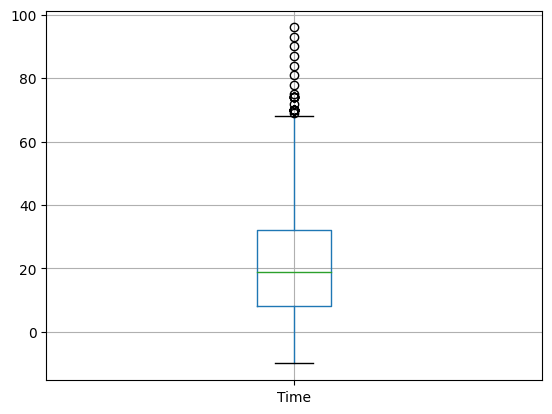

In [46]:
data.boxplot(column='Time')

<Axes: >

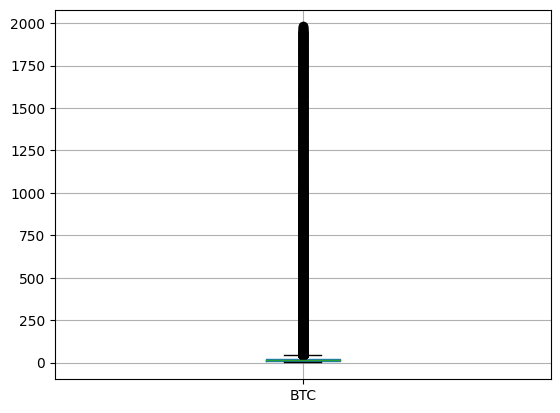

In [47]:
data.boxplot(column='BTC')

<Axes: >

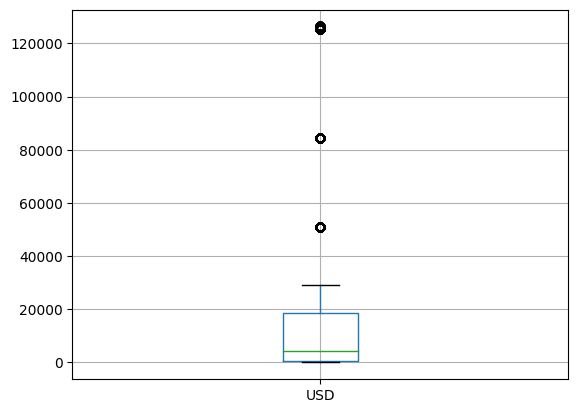

In [48]:
data.boxplot(column='USD')

<Axes: >

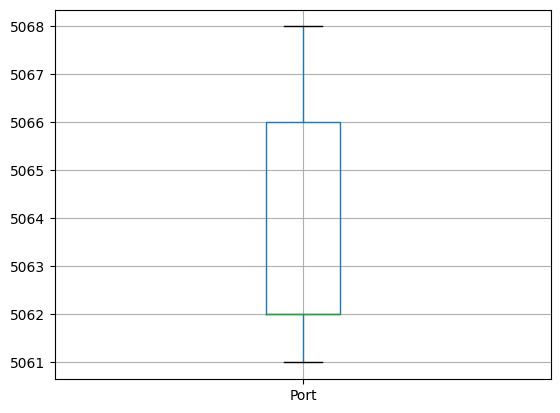

In [49]:
data.boxplot(column='Port')

<Axes: >

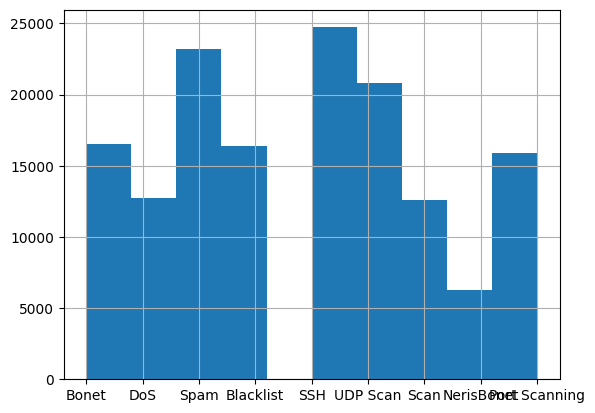

In [50]:
data['Threats'].hist()

<Axes: xlabel='Prediction', ylabel='count'>

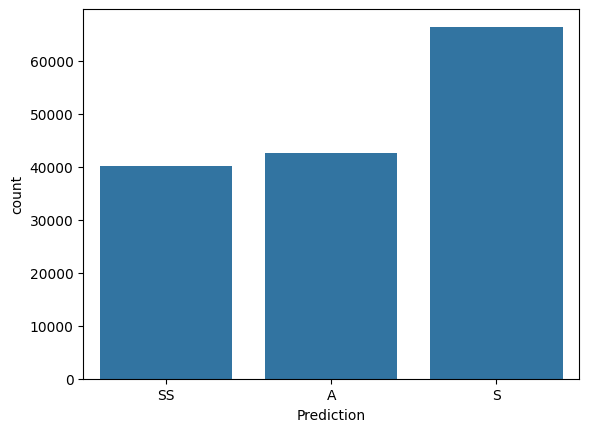

In [51]:
sns.countplot(x='Prediction', data=data)

In [52]:
# Identify categorical variables
categorical_cols = ['Protcol', 'Flag', 'Family', 'Threats']

In [53]:
# Numerical features
numerical_cols = ['Time', 'Clusters', 'BTC', 'USD', 'Netflow_Bytes', 'Port']

In [54]:
X_categorical = pd.get_dummies(data[categorical_cols])

In [55]:
X_numerical = data[numerical_cols]

In [56]:
# Concatenate one-hot encoded features with numerical features
X = pd.concat([X_categorical, X_numerical], axis=1)

In [57]:
y = data['Prediction']

In [58]:
# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [59]:
train=pd.read_csv('/content/drive/MyDrive/CS/test_data.csv')

In [60]:
test=pd.read_csv('/content/drive/MyDrive/CS/test_data.csv')

In [61]:
print(X_train.shape)
print(y_train.shape)

(118388, 44)
(118388,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [64]:
# Using Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='rbf', gamma='auto')  # You can experiment with different kernels and parameters
svm_classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [65]:
# Model evaluation
y_pred = svm_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9047267603743836
Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.89      0.87      8403
           S       0.94      0.91      0.92     13373
          SS       0.90      0.91      0.90      8033

    accuracy                           0.90     29809
   macro avg       0.90      0.90      0.90     29809
weighted avg       0.91      0.90      0.91     29809

